In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

2023-05-15 16:46:07.686471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shift/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
test_images.shape

(10000, 28, 28)

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

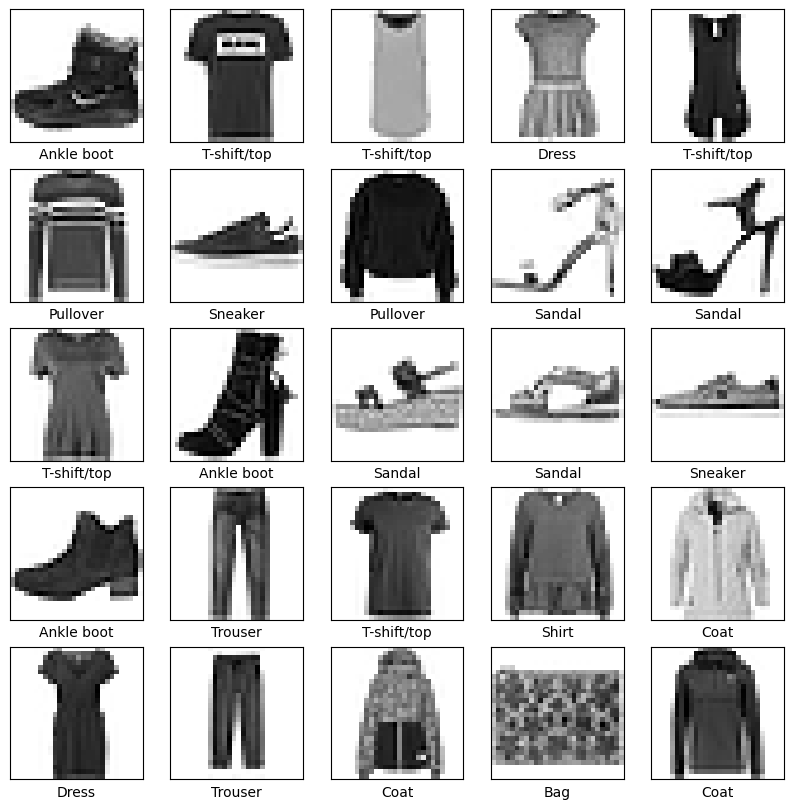

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4176 - accuracy: 0.8539
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4106 - accuracy: 0.8567
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8572
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3998 - accuracy: 0.8598
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.8609
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3909 - accuracy: 0.8623
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.8630
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8651
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8655
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.375

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 74.7258 - accuracy: 0.7297 - 339ms/epoch - 1ms/step

Test accuracy: 0.7297000288963318


In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 1ms/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

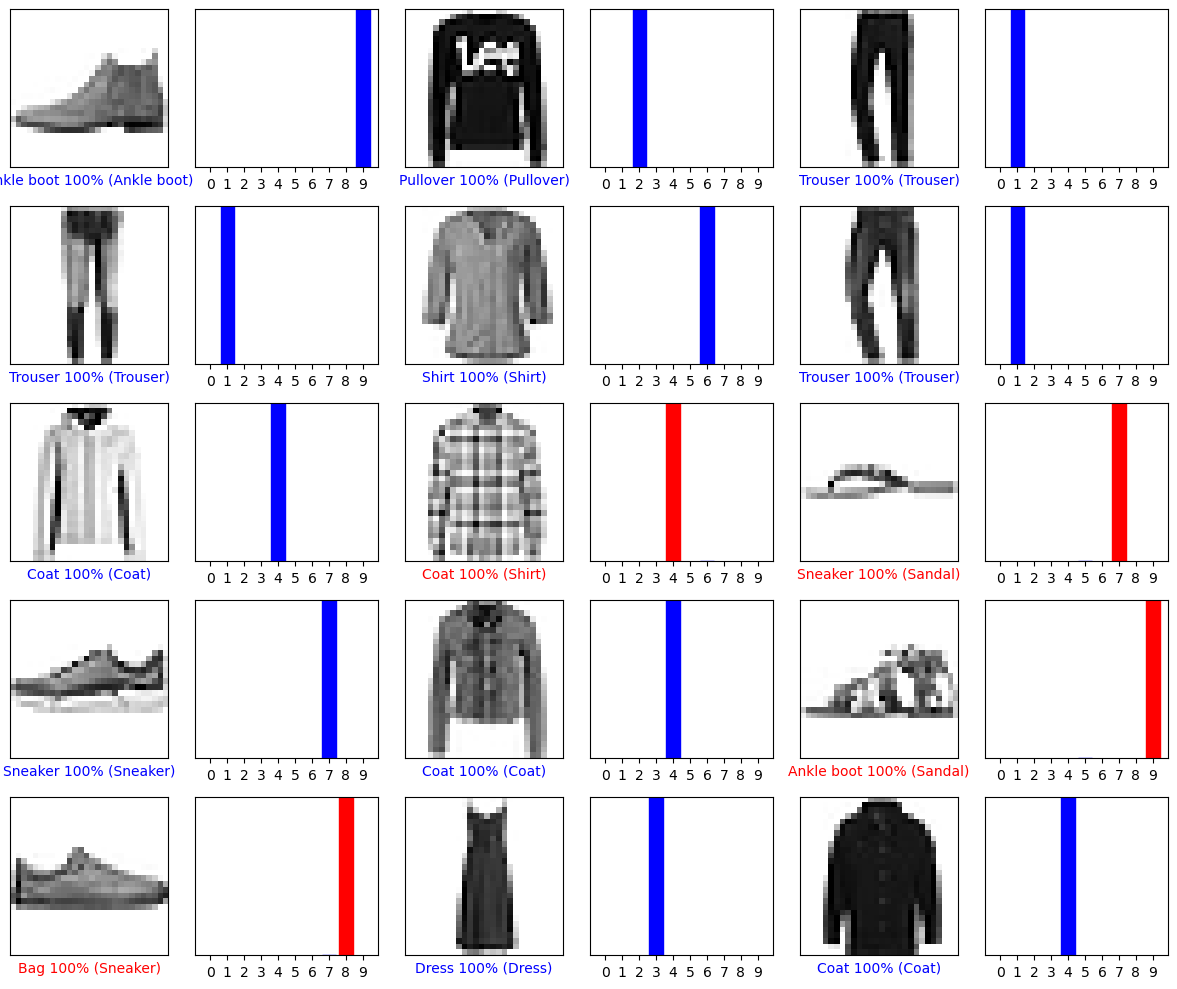

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i],test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()